# Analysis of Seattle Crime data in Summer 2014

## Class: Communicating Data Science Results
## Assignment: 1

In this assignment, I analyzed the given sample criminal incident data from Seattle during summer of 2014. I am  trying to identify some patterns based on some time-analysis and offense type counts. in this exerxise I just focus on the following areas:

1. What are the most frequent (Top 20 and case count above certain number, like 100, 500) crimes during this time period?
2. How do offense cases vary month to month?
3. Is there any pattern of incidents by time of a day?
4. Is there any pattern of incidents by day of a week?

I implementated my solutions in Ipython Notebook. I used some popular pytyon data analysis and visualiztion tools like pandas, numpy, matplotlib and seaborn.

Here is some quick conclusion:

1. top offense types can be checked by either 'Offense Type' or 'Summarized Offense Description'.
2. Quick plot of offense counts by month confirmed the following conclusion: No big offense change month-by-month, a small drop in Auguest detected.
3. This quick plot of offense counts by weekdays shows that no big offense change day-by-day, a small increase in Thursday detected.
4. this is the offense case count across 24 hours in a day. We do see 0 is a peak hour and 12pm follows it. Generally we see more cases happens in the afternoon and night. After mid-night, the cases drop again.

Future Work:

1. it'll be interesting to do some detailed time analysis on those top offenses(I did some quick analysis in this notebook).

2. it is also very interesting to do some mapp-based geo-analysis based on the location data provided.

The code and results are listed step-by-step as follows. The final conclusion and discussion of future works are at the end.

In [58]:
#Now let's open it with pandas
import pandas as pd
from pandas import Series,DataFrame

# read the csv file into a dataframe
seattle_df = pd.read_csv('seattle_incidents_summer_2014.csv',header=0)

# Let's see a preview of the data
seattle_df.head()

,RMS CDW ID,General Offense Number,Offense Code,Offense Code Extension,Offense Type,Summary Offense Code,Summarized Offense Description,Date Reported,Occurred Date or Date Range Start,Occurred Date Range End,Hundred Block Location,District/Sector,Zone/Beat,Census Tract 2000,Longitude,Latitude,Location,Month,Year
0,483839,2015218538,2202,0,BURGLARY-FORCE-RES,2200,BURGLARY,06/28/2015 10:31:00 AM,06/28/2014 10:31:00 AM,06/28/2015 10:31:00 AM,6XX BLOCK OF NW 74 ST,J,J2,2900.3013,-122.364672,47.682524,"(47.68252427, -122.364671996)",6,2014
1,481252,2015213067,2610,0,FRAUD-IDENTITY THEFT,2600,FRAUD,06/24/2015 11:09:00 AM,06/01/2014 12:00:00 AM,06/24/2015 11:09:00 AM,23XX BLOCK OF 43 AV E,C,C2,6300.1004,-122.277080,47.639901,"(47.639900761, -122.277080248)",6,2014
2,481375,2015210301,2316,0,THEFT-MAIL,2300,MAIL THEFT,06/22/2015 09:22:00 AM,08/31/2014 09:00:00 AM,NaN,81XX BLOCK OF 11 AV SW,F,F3,11300.5013,-122.349312,47.529232,"(47.529232299, -122.349312181)",8,2014
3,481690,2015209327,2599,0,COUNTERFEIT,2500,COUNTERFEIT,06/21/2015 03:52:00 PM,06/20/2014 01:38:00 PM,NaN,6XX BLOCK OF PINE ST,M,M2,8200.1002,-122.334818,47.612368,"(47.612368448, -122.334817763)",6,2014
4,478198,2015207880,2399,3,THEFT-OTH,2300,OTHER PROPERTY,06/20/2015 11:59:00 AM,06/01/2014 11:59:00 AM,11/01/2014 12:00:00 PM,77XX BLOCK OF SUNNYSIDE AV N,J,J3,2700.2015,-122.329379,47.685960,"(47.685959879, -122.329378505)",6,2014


In [59]:
# get more infomation about the data
seattle_df.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 32779 entries, 0 to 32778
Data columns (total 19 columns):
RMS CDW ID                           32779 non-null int64
General Offense Number               32779 non-null int64
Offense Code                         32779 non-null object
Offense Code Extension               32779 non-null int64
Offense Type                         32779 non-null object
Summary Offense Code                 32779 non-null object
Summarized Offense Description       32779 non-null object
Date Reported                        32779 non-null object
Occurred Date or Date Range Start    32779 non-null object
Occurred Date Range End              16499 non-null object
Hundred Block Location               32779 non-null object
District/Sector                      32722 non-null object
Zone/Beat                            32723 non-null object
Census Tract 2000                    32645 non-null float64
Longitude                            32779 non-null float64
Latitud

In [64]:
#adding two more columns and we'll check criminal counts by weekdays and hour-in-the-day
temp = pd.DatetimeIndex(seattle_df['Occurred Date or Date Range Start'])
seattle_df['weekday'] = temp.weekday
seattle_df['hour_in_the_day'] = temp.hour
#seattle_df['hour_in_the_day'].value_counts()
seattle_df.head()
#?pd.DatetimeIndex

In [11]:
#offense counts by month
seattle_df['Month'].value_counts()


7    11154
6    11125
8    10500
dtype: int64

No big change found month-by-month. We do see a small drop in August.

In [12]:
#seattle_df['Year'].value_counts()

2014    32779
dtype: int64

In [13]:
# Let's import what we'll need for the analysis and visualization
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

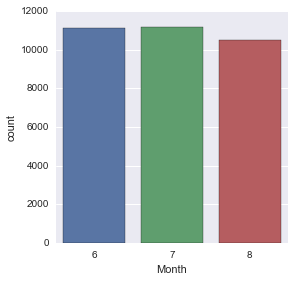

In [80]:
sns.factorplot("Month", data=seattle_df, kind='count', order=[6,7,8])

### This quick plot of offense counts by month confirmed the above conclusion: No big offense change month-by-month, a small drop in Auguest detected.

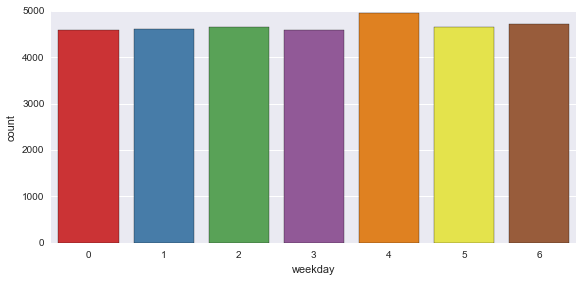

In [81]:
sns.factorplot("weekday", data=seattle_df, 
               orient="v", size=4, aspect=2, palette="Set1", order = [0,1,2,3,4,5,6],
               kind='count')

### This quick plot of offense counts by weekdays shows that no big offense change day-by-day, a small increase in Thursday detected.

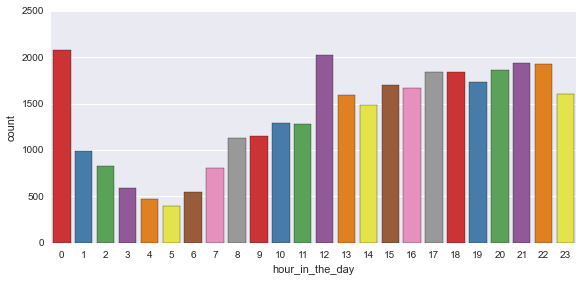

In [94]:
sns.factorplot("hour_in_the_day", data=seattle_df, 
               orient="v", size=4, aspect=2, palette="Set1", order=range(0,24),
               kind='count')

### this is the offense case count across 24 hours in a day. We do see 0 is a peak hour and 12pm follows it. Generally we see more cases happens in the afternoon and night. After mid-night, the cases drop again.

In [95]:
seattle_df['Summarized Offense Description'].value_counts()

CAR PROWL                      6230
OTHER PROPERTY                 3755
BURGLARY                       3212
VEHICLE THEFT                  3057
PROPERTY DAMAGE                2365
ASSAULT                        2018
FRAUD                          1473
DISTURBANCE                    1333
THREATS                        1178
STOLEN PROPERTY                1136
WARRANT ARREST                 1021
SHOPLIFTING                     944
BIKE THEFT                      797
ROBBERY                         736
TRESPASS                        486
NARCOTICS                       391
BURGLARY-SECURE PARKING-RES     388
MAIL THEFT                      264
TRAFFIC                         252
PROSTITUTION                    202
DISPUTE                         171
LOST PROPERTY                   162
COUNTERFEIT                     159
PICKPOCKET                      146
WEAPON                          137
ANIMAL COMPLAINT                 96
THEFT OF SERVICES                96
VIOLATION OF COURT ORDER    

In [82]:
seattle_df['Offense Type'].value_counts()

THEFT-CARPROWL                    6230
VEH-THEFT-AUTO                    2588
THEFT-OTH                         2221
PROPERTY DAMAGE-NON RESIDENTIA    1638
ASSLT-NONAGG                      1320
DISTURBANCE-OTH                   1295
BURGLARY-FORCE-RES                1147
BURGLARY-NOFORCE-RES              1118
PROPERTY FOUND                    1069
THEFT-SHOPLIFT                     944
THEFT-BUILDING                     846
THEFT-BICYCLE                      797
WARRARR-FELONY                     565
BURGLARY-FORCE-NONRES              524
HARASSMENT                         523
TRESPASS                           486
FRAUD-IDENTITY THEFT               458
FRAUD-CREDIT CARD                  443
ASSLT-AGG-WEAPON                   421
PROPERTY DAMAGE-RESIDENTIAL        419
WARRARR-MISDEMEANOR                416
ROBBERY-STREET-BODYFORCE           400
THREATS-OTHER                      389
BURGLARY-SECURE PARKING-RES        388
BURGLARY-NOFORCE-NONRES            372
THEFT-LICENSE PLATE      

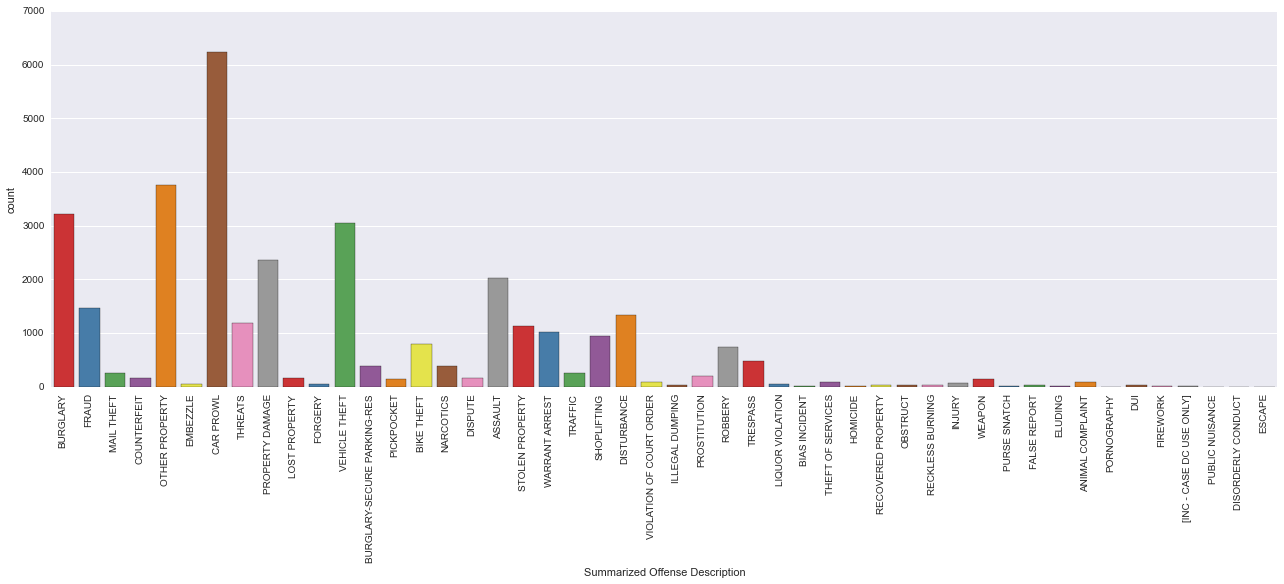

In [83]:
#offense counts by 'Summarized Offense Description'
seattle_df['Summarized Offense Description'].value_counts()
g = sns.factorplot("Summarized Offense Description", data=seattle_df, 
               orient="h", size=6, aspect=3, palette="Set1",
               kind='count')
g.set_xticklabels(rotation='vertical')

In [84]:
top500_by_desc = seattle_df.groupby("Summarized Offense Description").filter(lambda x: len(x) > 500)

In [96]:
seattle_df['Offense Type'].value_counts()[0:20]

THEFT-CARPROWL                    6230
VEH-THEFT-AUTO                    2588
THEFT-OTH                         2221
PROPERTY DAMAGE-NON RESIDENTIA    1638
ASSLT-NONAGG                      1320
DISTURBANCE-OTH                   1295
BURGLARY-FORCE-RES                1147
BURGLARY-NOFORCE-RES              1118
PROPERTY FOUND                    1069
THEFT-SHOPLIFT                     944
THEFT-BUILDING                     846
THEFT-BICYCLE                      797
WARRARR-FELONY                     565
BURGLARY-FORCE-NONRES              524
HARASSMENT                         523
TRESPASS                           486
FRAUD-IDENTITY THEFT               458
FRAUD-CREDIT CARD                  443
ASSLT-AGG-WEAPON                   421
PROPERTY DAMAGE-RESIDENTIAL        419
dtype: int64

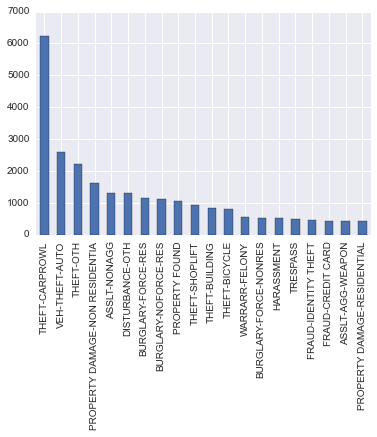

In [85]:
seattle_df['Offense Type'].value_counts()[0:20].plot(kind='bar')

## this highlights the top 20 Offense types in seattle during the specified time range.

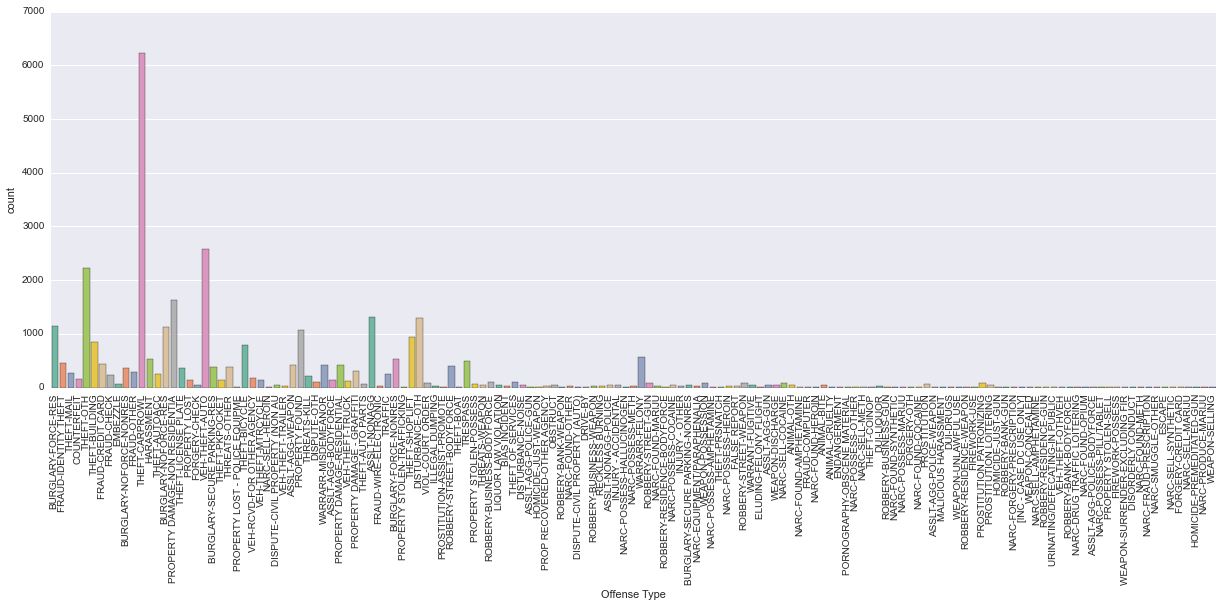

In [86]:
# a hist plot of all the case count for all 'Offense Type'
g = sns.factorplot("Offense Type", data=seattle_df, 
               orient="h", size=6, aspect=3, palette="Set2",
               kind='count')
g.set_xticklabels(rotation='vertical')
#g.set_xlabels(label=None)

In [87]:
# filter out all the 'Offense Types' having > 100 case count.
top100 = seattle_df.groupby("Offense Type").filter(lambda x: len(x) > 100)


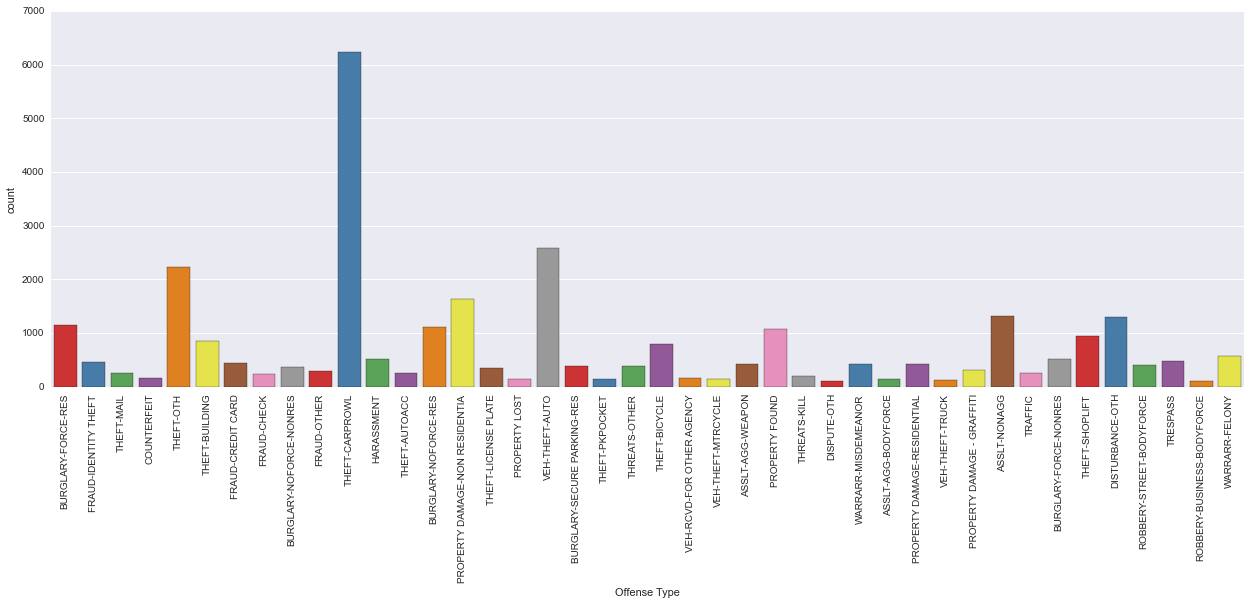

In [88]:
# quick hist plot of the case count number for those types
g = sns.factorplot("Offense Type", data=top100, 
               orient="h", size=6, aspect=3, palette="Set1",
               kind='count')
g.set_xticklabels(rotation='vertical')

In [89]:
# filter out all the 'Offense Types' having > 500 case count.
top500 = seattle_df.groupby("Offense Type").filter(lambda x: len(x) > 500)

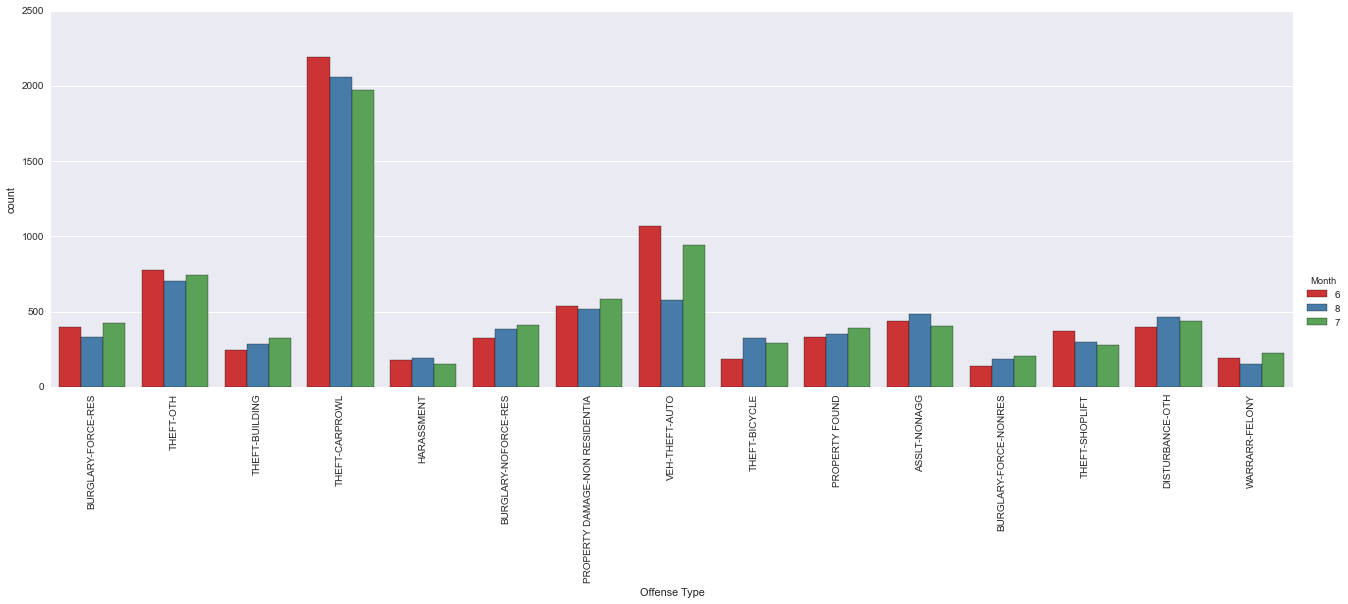

In [90]:
# a quick check on top offense types(case num > 500) vary month by month
g = sns.factorplot("Offense Type", data=top500, hue="Month",
               size=6, aspect=3, palette="Set1",
               kind='count')
g.set_xticklabels(rotation='vertical')

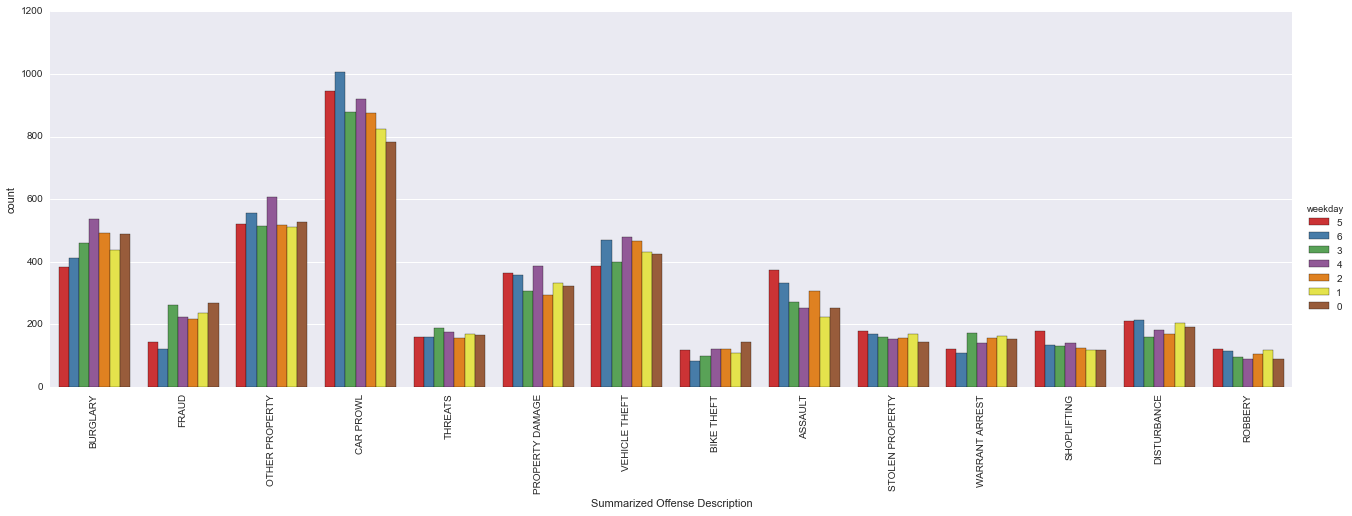

In [93]:
# this one shows those top offense type(by description, counts >500 ), what is the change for each weekday
# no specific common peak day detected
g = sns.factorplot("Summarized Offense Description", data=top500_by_desc, hue='weekday',
               orient="h", size=6, aspect=3, palette="Set1",
               kind='count')
g.set_xticklabels(rotation='vertical')